# SITUATION PROBLEM 2

Santiago Quintana Moreno A01571222

Miguel Ángel Álvarez Hermida A01722925

Alfredo Luce Morales A01772499

Benjamin Christian Blaga A01830797

In [390]:
import matplotlib.pyplot as plt
import heapq
import random

# PART 1

In [391]:
def parse_graph_file(path):
    data = {
        "num_nodes": 0,
        "num_edges": 0,
        "nodes": {},
        "edges": [],
        "office": None,
        "new_nodes": []
    }

    section = None  
    
    with open(path, "r") as f:
        for line in f:
            line = line.strip()

            if not line:
                continue

            if data["num_nodes"] == 0 and data["num_edges"] == 0:
                parts = line.split()
                data["num_nodes"] = int(parts[0])
                data["num_edges"] = int(parts[1])
                continue

            if line.startswith("[") and line.endswith("]"):
                section = line[1:-1] 
                continue

            parts = line.split()

            if section == "NODES":
                node_id = int(parts[0])
                x = float(parts[1])
                y = float(parts[2])
                is_pump = bool(int(parts[3]))
                data["nodes"][node_id] = (x, y, is_pump)

            elif section == "EDGES":
                u = int(parts[0])
                v = int(parts[1])
                w = float(parts[2])
                data["edges"].append((u, v, w))

            elif section == "OFFICE":
                data["office"] = int(parts[0])

            elif section == "NEW":
                x = float(parts[0])
                y = float(parts[1])
                w = float(parts[2])
                data["new_nodes"].append((x, y, w))

    return data


In [392]:
# Data selection, please uncomment to choose the desired dataset

data  = parse_graph_file("FOS.txt")
#data  = parse_graph_file("HAN.txt")
#data  = parse_graph_file("NYT.txt")
#data  = parse_graph_file("PES.txt")

print(data["num_nodes"])
print(data["num_edges"])
print(data["nodes"][1])
print(data["edges"][:5])
print(data["office"])
print(data["new_nodes"])


37
58
(7111.65, 7532.36, False)
[(1, 17, 43.8), (17, 2, 19.0), (2, 3, 17.0), (3, 4, 19.0), (4, 5, 29.0)]
4
[(7071.0, 9055.0, 50.0), (1957.0, 9160.0, 45.0)]


# PART 2

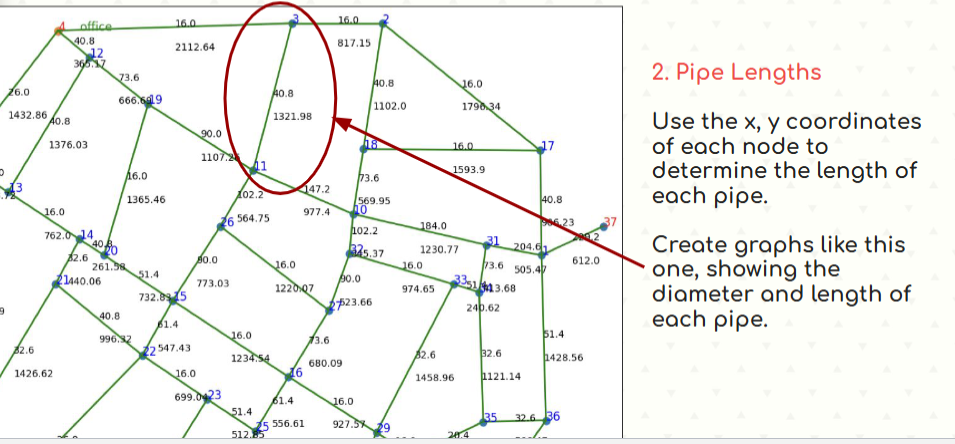

In [393]:
def pipe_length(u, v):
    x1, y1 = u[0], u[1]
    x2, y2 = v[0], v[1]
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def pipe_graph(data, update_edges=True, return_lengths=False):
    lengths = []
    new_edges = []
    for edge in data["edges"]:
        if len(edge) == 4:
            u, v, w, length = edge
        else:
            u, v, w = edge
            node_u = data["nodes"][u]
            node_v = data["nodes"][v]
            length = pipe_length(node_u, node_v)
        lengths.append((u, v, w, length))
        new_edges.append((u, v, w, length))
    if update_edges:
        data["edges"] = new_edges
    if return_lengths:
        return lengths
    return data

pipe_graph(data)

{'num_nodes': 37,
 'num_edges': 58,
 'nodes': {2: (5679.61, 9538.83, False),
  3: (4862.46, 9538.83, False),
  4: (2750.81, 9474.11, False),
  5: (1852.75, 8357.61, False),
  6: (1974.11, 6076.05, False),
  7: (1974.11, 5149.68, True),
  8: (4235.44, 5076.86, False),
  9: (6411.81, 5093.04, False),
  10: (5412.62, 7888.35, False),
  11: (4510.52, 8264.56, False),
  12: (3033.98, 9243.53, False),
  13: (2301.78, 8078.48, False),
  14: (2944.98, 7669.9, False),
  15: (3786.41, 7139.97, False),
  16: (4830.1, 6480.58, False),
  17: (7099.51, 8438.51, False),
  18: (5505.66, 8450.65, False),
  19: (3563.92, 8839.0, False),
  20: (3167.48, 7532.36, False),
  21: (2730.58, 7285.6, False),
  22: (3511.33, 6666.67, False),
  23: (4097.9, 6286.41, False),
  24: (3337.38, 5121.36, False),
  25: (4530.74, 6011.33, False),
  26: (4215.21, 7783.17, False),
  27: (5194.17, 7055.02, False),
  28: (5218.45, 5089.0, False),
  29: (5622.98, 5999.19, False),
  30: (5950.65, 5796.93, False),
  31: (6614.0

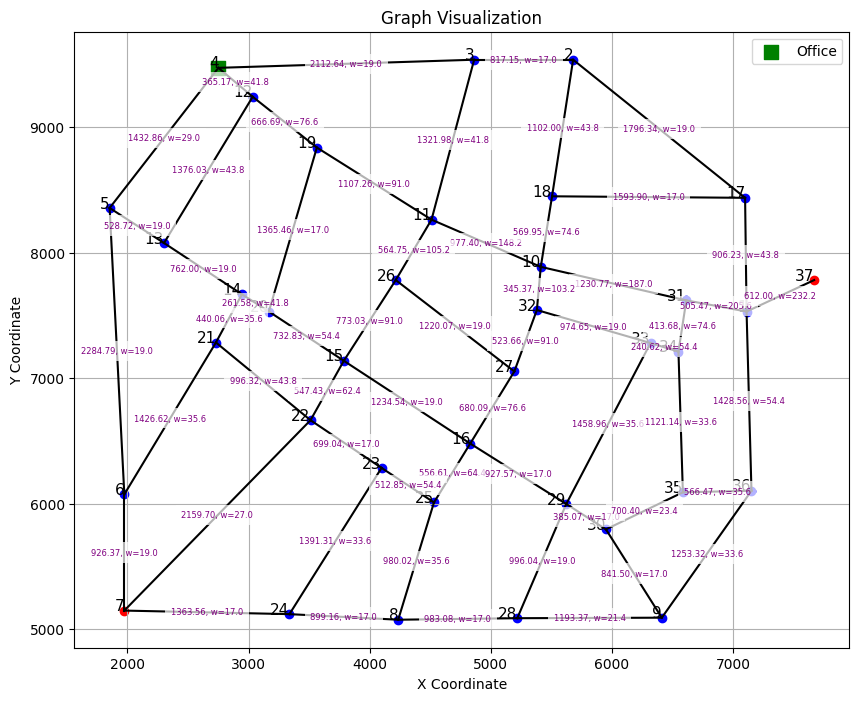

In [394]:
def draw_graph(data, compute_missing=False):
    plt.figure(figsize=(10, 8))

    for node_id, node in data["nodes"].items():
        if isinstance(node, (list, tuple)) and len(node) == 3:
            x, y, is_pump = node
        elif isinstance(node, (list, tuple)) and len(node) == 4:
            _, x, y, is_pump = node
        else:
            x, y = node[0], node[1]
            is_pump = False
        color = 'red' if is_pump else 'blue'
        plt.scatter(x, y, c=color)
        plt.text(x, y, str(node_id), fontsize=11, ha='right')

    for edge in data.get("edges", []):
        if len(edge) == 4:
            u, v, w, length = edge
        else:
            u, v, w = edge
            length = None
        nu = data["nodes"][u]
        nv = data["nodes"][v]
        x1 = nu[0] if len(nu) == 3 else nu[1]
        y1 = nu[1] if len(nu) == 3 else nu[2]
        x2 = nv[0] if len(nv) == 3 else nv[1]
        y2 = nv[1] if len(nv) == 3 else nv[2]
        plt.plot([x1, x2], [y1, y2], 'k-')
        if length is None and compute_missing:
            length = pipe_length(nu, nv)
        label = f"{length:.2f}, w={w}" if length is not None else f"n/a, w={w}"
        midx, midy = (x1 + x2) / 2, (y1 + y2) / 2
        plt.text(midx, midy, label, fontsize=6, color='purple', ha='center', va='center',
                 backgroundcolor='white', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    office_node = data.get("nodes", {}).get(data.get("office"))
    if office_node is not None:
        ox = office_node[0] if len(office_node) == 3 else office_node[1]
        oy = office_node[1] if len(office_node) == 3 else office_node[2]
        plt.scatter(ox, oy, c='green', marker='s', s=100, label='Office')

    plt.title("Graph Visualization")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid()
    plt.show()

draw_graph(data)

# PART 3

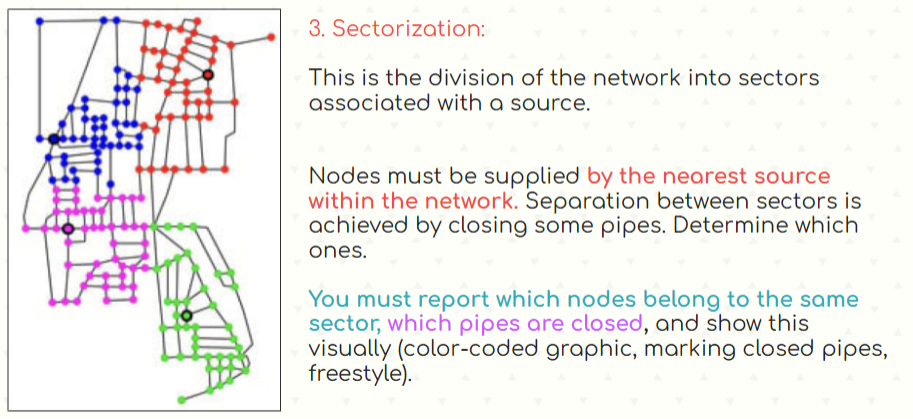

In [395]:
def sectorize(data):
    nodes = data["nodes"]
    edges = data["edges"]

    graph = {nid: [] for nid in nodes}

    for edge in edges:
        u, v = edge[0], edge[1]
        
        if len(edge) == 4:
            length = edge[3]
        else:
            node_u = nodes[u]
            node_v = nodes[v]
            length = pipe_length(node_u, node_v)
        
        graph[u].append((v, length))
        graph[v].append((u, length))

    pumps = [nid for nid, info in nodes.items() if info[2] == True]

    if not pumps:
        raise ValueError("No pumps found in the network.")
    
    print(f"Found {len(pumps)} pump(s): {pumps}")

    dist = {nid: float("inf") for nid in nodes}
    label = {nid: None for nid in nodes} 
    
    pq = []

    for pump in pumps:
        dist[pump] = 0
        label[pump] = pump
        heapq.heappush(pq, (0, pump, pump))

    processed = 0
    while pq:
        current_dist, source_pump, u = heapq.heappop(pq)

        if current_dist > dist[u]:
            continue
        
        if current_dist == dist[u] and label[u] is not None:
            if source_pump >= label[u]:
                continue
        
        dist[u] = current_dist
        label[u] = source_pump
        processed += 1

        for v, length in graph[u]:
            new_dist = current_dist + length

            if new_dist < dist[v]:
                dist[v] = new_dist
                label[v] = source_pump
                heapq.heappush(pq, (new_dist, source_pump, v))
            elif new_dist == dist[v] and (label[v] is None or source_pump < label[v]):
                label[v] = source_pump
                heapq.heappush(pq, (new_dist, source_pump, v))


    unassigned = [nid for nid in nodes if label[nid] is None]
    if unassigned:
        print(f"WARNING: {len(unassigned)} nodes could not be assigned to any sector!")
        print(f"Unassigned nodes: {unassigned}")
        for nid in unassigned:
            nx, ny = nodes[nid][0], nodes[nid][1]
            best_pump = min(pumps, key=lambda p: 
                          ((nodes[p][0]-nx)**2 + (nodes[p][1]-ny)**2)**0.5)
            label[nid] = best_pump
            print(f"  Assigned node {nid} to pump {best_pump} (fallback)")

    closed_pipes = []
    for edge in edges:
        u, v = edge[0], edge[1]
        if label[u] != label[v]:
            closed_pipes.append((u, v))

    sectors = {}
    for nid, sector_id in label.items():
        sectors.setdefault(sector_id, []).append(nid)

    print(f"\nSectorization complete:")
    for pump in pumps:
        sector_nodes = sectors.get(pump, [])
        print(f"  Sector {pump}: {len(sector_nodes)} nodes")
    print(f"  Pipes to close: {len(closed_pipes)}")

    return {
        "distances": dist,
        "labels": label,
        "sectors": sectors,
        "closed_pipes": closed_pipes
    }

Found 2 pump(s): [7, 37]
Unassigned nodes: [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 1]
  Assigned node 2 to pump 37 (fallback)
  Assigned node 3 to pump 37 (fallback)
  Assigned node 4 to pump 7 (fallback)
  Assigned node 5 to pump 7 (fallback)
  Assigned node 6 to pump 7 (fallback)
  Assigned node 8 to pump 7 (fallback)
  Assigned node 9 to pump 37 (fallback)
  Assigned node 10 to pump 37 (fallback)
  Assigned node 11 to pump 37 (fallback)
  Assigned node 12 to pump 7 (fallback)
  Assigned node 13 to pump 7 (fallback)
  Assigned node 14 to pump 7 (fallback)
  Assigned node 15 to pump 7 (fallback)
  Assigned node 16 to pump 37 (fallback)
  Assigned node 17 to pump 37 (fallback)
  Assigned node 18 to pump 37 (fallback)
  Assigned node 19 to pump 7 (fallback)
  Assigned node 20 to pump 7 (fallback)
  Assigned node 21 to pump 7 (fallback)
  Assigned node 22 to pump 7 (fallback)
  Assigned node 23 to p

C:\Users\santy\AppData\Local\Temp\ipykernel_33292\1685672638.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


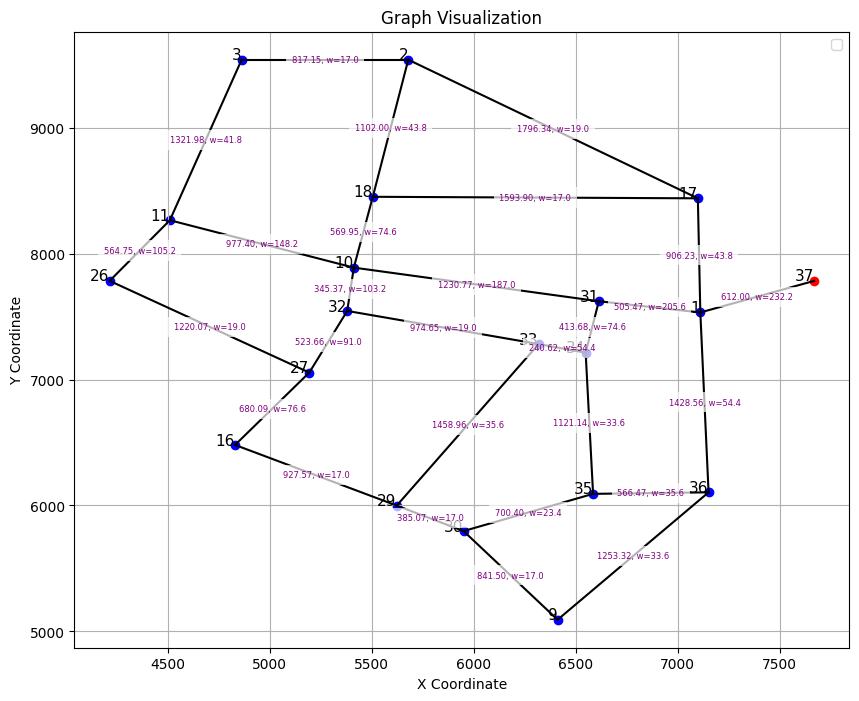


Drawing Sector 7 with 17 nodes...


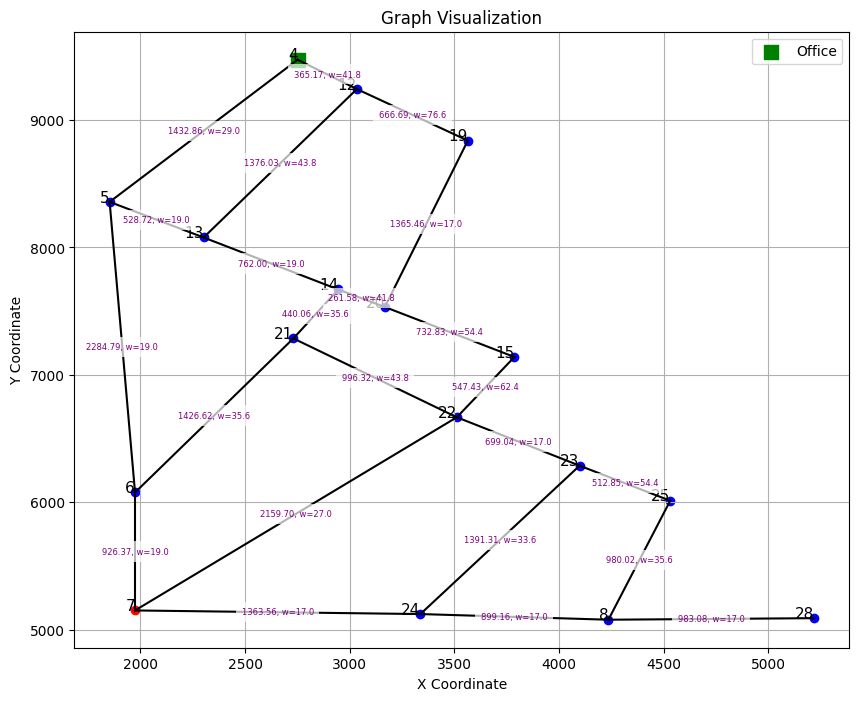

In [396]:
result = sectorize(data)

print("SECTOR BREAKDOWN")

for pump, nodes_list in result["sectors"].items():
    print(f"\nSector {pump} (Pump):")
    print(f"  Total nodes: {len(nodes_list)}")
    print(f"  Nodes: {sorted(nodes_list)}")

print("Individual Sector Visualizations:")

for pump, nodes_list in result["sectors"].items():
    subgraph = {
        "nodes": {nid: data["nodes"][nid] for nid in nodes_list},
        "edges": [e for e in data["edges"] if e[0] in nodes_list and e[1] in nodes_list],
        "office": data["office"] if data["office"] in nodes_list else None
    }
    print(f"\nDrawing Sector {pump} with {len(nodes_list)} nodes...")
    draw_graph(subgraph)

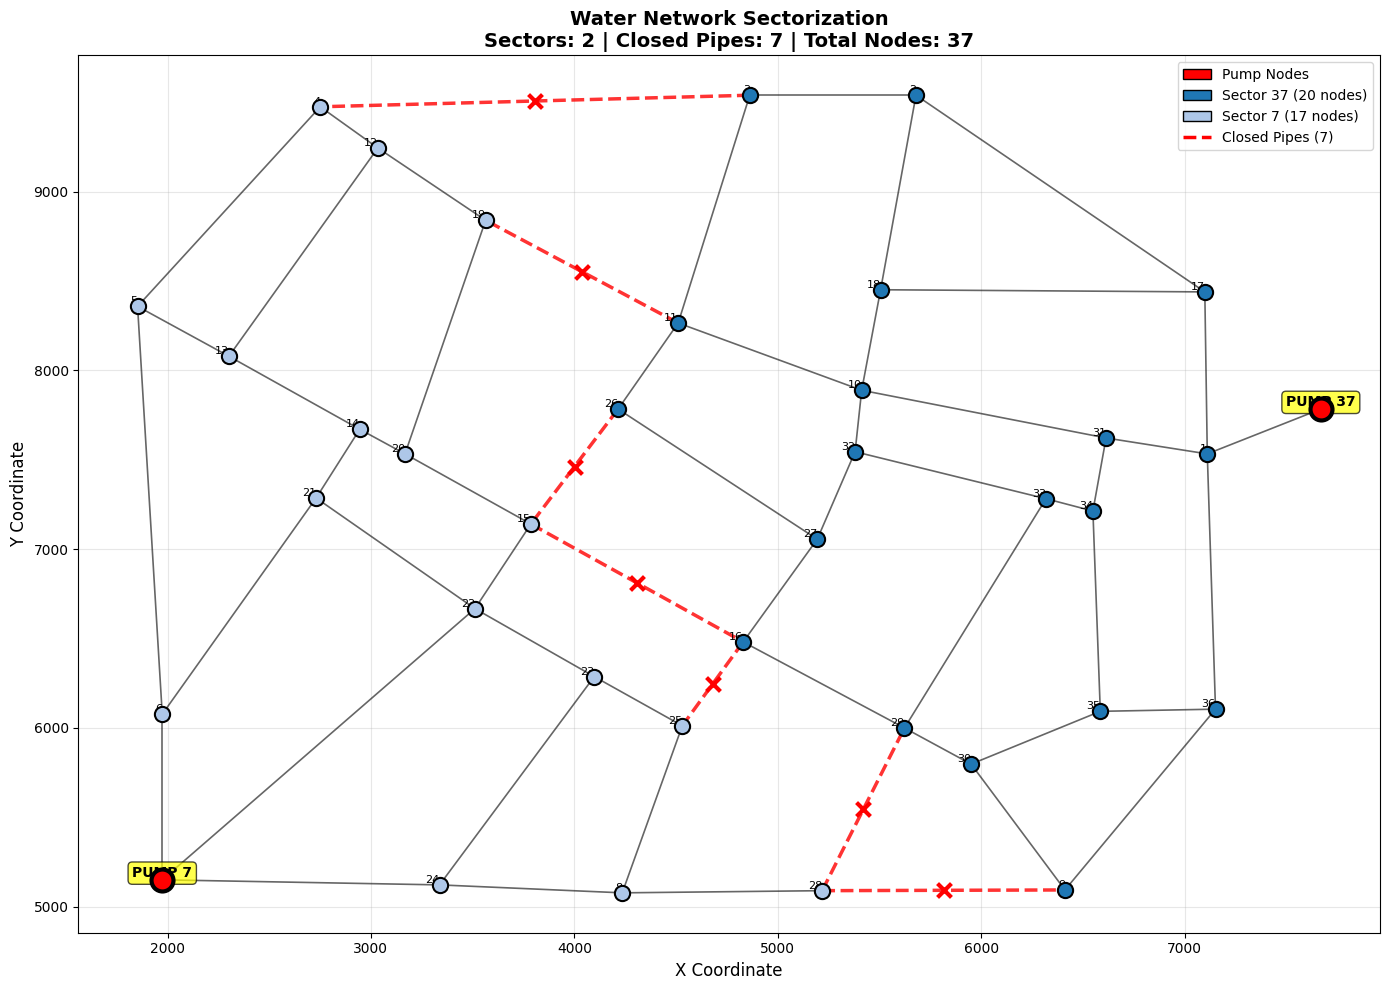


SECTORIZATION SUMMARY
Total Nodes: 37
Total Sectors: 2
Closed Pipes: 7

Sector Details:
  Sector 37 (Pump): 20 nodes
    Nodes: [2, 3, 9, 10, 11, 16, 17, 18, 26, 27]... (10 more)
  Sector 7 (Pump): 17 nodes
    Nodes: [4, 5, 6, 7, 8, 12, 13, 14, 15, 19]... (7 more)

Closed Pipes (Sector Boundaries):
  1. Pipe (3, 4): connects Sector 37 ↔ Sector 7
  2. Pipe (28, 9): connects Sector 7 ↔ Sector 37
  3. Pipe (11, 19): connects Sector 37 ↔ Sector 7
  4. Pipe (16, 25): connects Sector 37 ↔ Sector 7
  5. Pipe (26, 15): connects Sector 37 ↔ Sector 7
  6. Pipe (15, 16): connects Sector 7 ↔ Sector 37
  7. Pipe (28, 29): connects Sector 7 ↔ Sector 37


In [397]:
def draw_sectors(data, result):
    nodes = data["nodes"]
    edges = data["edges"]
    labels = result["labels"]
    closed = set(tuple(sorted((u, v))) for u, v in result["closed_pipes"])

    cmap = plt.get_cmap("tab20")
    sector_ids = list(result["sectors"].keys())
    
    palette = {}
    for i, sid in enumerate(sector_ids):
        palette[sid] = cmap(i % 20)

    plt.figure(figsize=(14, 10))

    for edge in edges:
        u, v = edge[0], edge[1]
        nu = nodes[u]
        nv = nodes[v]

        x1, y1 = nu[0], nu[1]
        x2, y2 = nv[0], nv[1]

        edge_key = tuple(sorted((u, v)))
        
        if edge_key in closed:
            plt.plot([x1, x2], [y1, y2], 'r--', linewidth=2.5, 
                    alpha=0.8, label='Closed Pipe' if edge_key == list(closed)[0] else '')
            mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
            plt.scatter(mid_x, mid_y, c='red', marker='x', s=100, 
                       linewidths=3, zorder=4)
        else:
            plt.plot([x1, x2], [y1, y2], 'k-', linewidth=1.2, alpha=0.6)

    for nid, (x, y, is_pump) in nodes.items():
        sector = labels[nid]
        color = palette.get(sector, (0.5, 0.5, 0.5))

        if is_pump:
            plt.scatter(x, y, s=250, c='red', edgecolors='black', 
                       linewidths=3, marker='o', zorder=6)
            plt.text(x, y+15, f'PUMP {nid}', fontsize=10, ha='center', 
                    fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', 
                    facecolor='yellow', alpha=0.7))
        else:
            plt.scatter(x, y, s=120, c=[color], marker='o', 
                       edgecolors='black', linewidths=1.5, zorder=5)
            plt.text(x, y, str(nid), fontsize=8, ha='right', va='bottom')

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', edgecolor='black', label='Pump Nodes'),
    ]
    
    for pump in sector_ids:
        sector_nodes = result["sectors"].get(pump, [])
        color = palette[pump]
        legend_elements.append(
            Patch(facecolor=color, edgecolor='black', 
                 label=f'Sector {pump} ({len(sector_nodes)} nodes)')
        )
    
    from matplotlib.lines import Line2D
    legend_elements.append(
        Line2D([0], [0], color='red', linewidth=2.5, linestyle='--',
              label=f'Closed Pipes ({len(closed)})')
    )

    plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

    plt.title("Water Network Sectorization\n" + 
             f"Sectors: {len(sector_ids)} | Closed Pipes: {len(closed)} | " +
             f"Total Nodes: {len(nodes)}", 
             fontsize=14, fontweight='bold')
    plt.xlabel("X Coordinate", fontsize=12)
    plt.ylabel("Y Coordinate", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\n" + "="*70)
    print("SECTORIZATION SUMMARY")
    print("="*70)
    print(f"Total Nodes: {len(nodes)}")
    print(f"Total Sectors: {len(sector_ids)}")
    print(f"Closed Pipes: {len(closed)}")
    print("\nSector Details:")
    for pump in sector_ids:
        sector_nodes = result["sectors"].get(pump, [])
        print(f"  Sector {pump} (Pump): {len(sector_nodes)} nodes")
        preview = sector_nodes[:10]
        if len(sector_nodes) > 10:
            print(f"    Nodes: {preview}... ({len(sector_nodes)-10} more)")
        else:
            print(f"    Nodes: {preview}")
    
    print(f"\nClosed Pipes (Sector Boundaries):")
    for i, (u, v) in enumerate(result["closed_pipes"], 1):
        print(f"  {i}. Pipe ({u}, {v}): connects Sector {labels[u]} ↔ Sector {labels[v]}")
    print("="*70)

draw_sectors(data, result)

# PART 4

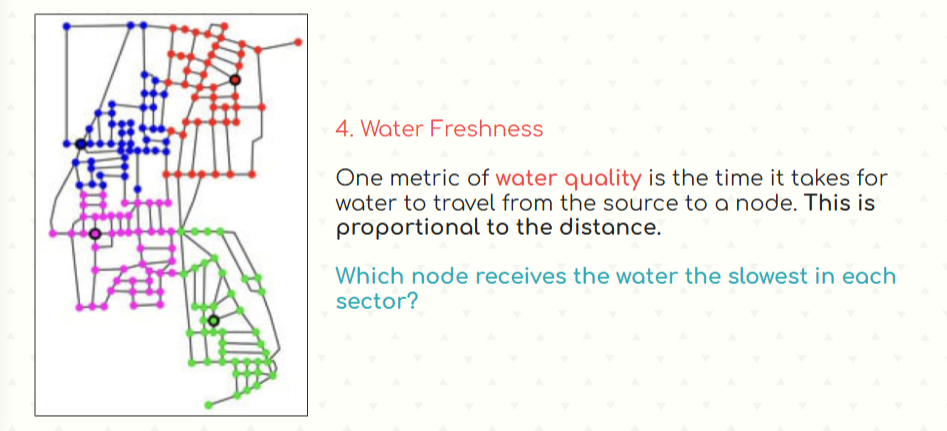


In [398]:
def water_freshness(result):
    distances = result["distances"]

    sinks = {}
    for pump, nodes in result["sectors"].items():
        if not nodes:
            sinks[pump] = None
            continue
        far = None
        max_dist = -float("inf")
        for node in nodes:
            node_dist = distances.get(node, -float("inf"))
            if node_dist > max_dist:
                max_dist = node_dist
                far = node
        sinks[pump] = far

    return sinks

In [399]:
sinks = water_freshness(result)

print("Sinks (farthest nodes) per sector:")
for pump, sink in sinks.items():
    print(f"  Sector {pump}: Sink Node = {sink}")


Sinks (farthest nodes) per sector:
  Sector 37: Sink Node = 2
  Sector 7: Sink Node = 4


# PART 5

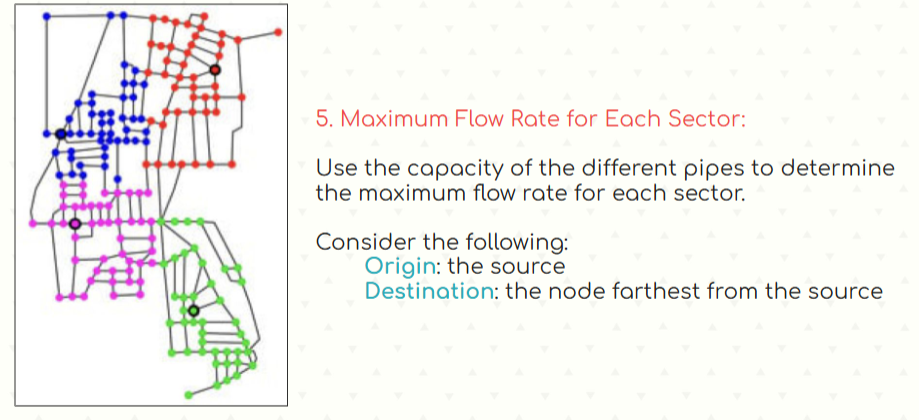

In [400]:
def ford_fulkerson(data, result, sinks):
    from collections import deque

    nodes_data = data["nodes"]
    edges = data["edges"]
    sectors = result["sectors"]

    max_id = max(nodes_data.keys())
    n = max_id + 1

    capacity = [[0.0]*n for _ in range(n)]
    for e in edges:
        u, v = e[0], e[1]
        w = e[2] if len(e) >= 3 else 0.0
        capacity[u][v] = w
        capacity[v][u] = w

    def bfs_find_path(residual, s, t):
        parent = [-1]*n
        q = deque([s])
        parent[s] = s
        while q:
            u = q.popleft()
            for v in range(n):
                if parent[v] == -1 and residual[u][v] > 0:
                    parent[v] = u
                    if v == t:
                        path = []
                        cur = t
                        while cur != s:
                            path.append(cur)
                            cur = parent[cur]
                        path.append(s)
                        path.reverse()
                        return path
                    q.append(v)
        return None

    results = {}
    for pump in sectors.keys():
        sink = sinks.get(pump)
        if sink is None:
            results[pump] = 0
            continue
        if pump == sink:
            results[pump] = 0
            continue
        if pump not in nodes_data or sink not in nodes_data:
            results[pump] = 0
            continue

        seen = set([pump])
        q = deque([pump])
        reachable = False
        while q:
            u = q.popleft()
            if u == sink:
                reachable = True
                break
            for v in range(n):
                if v not in seen and capacity[u][v] > 0:
                    seen.add(v)
                    q.append(v)
        if not reachable:
            results[pump] = 0
            print("  -> unreachable sink, flow=0")
            continue

        residual = [row[:] for row in capacity]
        max_flow = 0.0
        while True:
            path = bfs_find_path(residual, pump, sink)
            if not path:
                break
            bottleneck = min(residual[path[i]][path[i+1]] for i in range(len(path)-1))
            for i in range(len(path)-1):
                u = path[i]; v = path[i+1]
                residual[u][v] -= bottleneck
                residual[v][u] += bottleneck
            max_flow += bottleneck
        results[pump] = max_flow
        print(f"  -> flow={max_flow}")

    return results

In [401]:
max_flows = ford_fulkerson(data, result, sinks)
print("Max flows from pumps to sinks:")
for pump, flow in max_flows.items():
    print(f"  Pump {pump} to Sink {sinks[pump]}: Flow = {flow}")

  -> flow=79.8
  -> flow=63.0
Max flows from pumps to sinks:
  Pump 37 to Sink 2: Flow = 79.8
  Pump 7 to Sink 4: Flow = 63.0


# PART 6

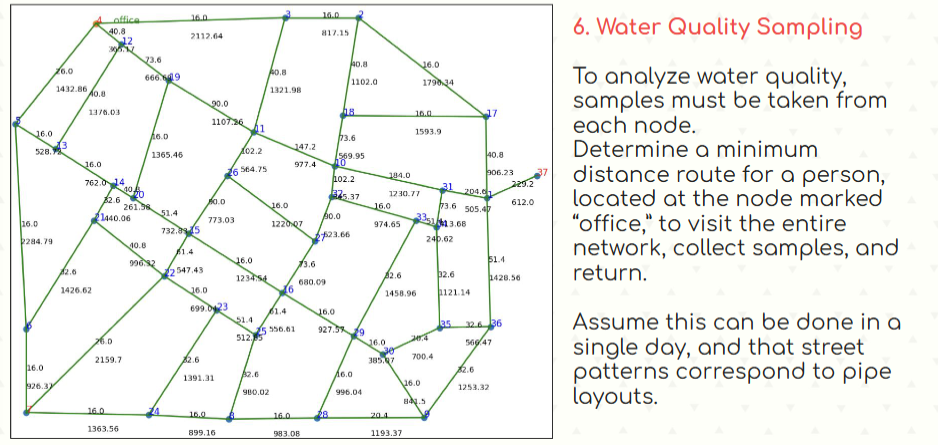

In [402]:
def sampling(data):
    nodes = data["nodes"]
    edges = data["edges"]
    office = data["office"]

    if office is None:
        raise ValueError("No office node defined in data")

    node_ids = list(nodes.keys())
    n = len(node_ids)
    id_to_idx = {nid: i for i, nid in enumerate(node_ids)}

    INF = float('inf')
    dist_matrix = [[INF]*n for _ in range(n)]

    for i in range(n):
        dist_matrix[i][i] = 0.0

    for edge in edges:
        u, v = edge[0], edge[1]
        length = edge[3] if len(edge) == 4 else pipe_length(nodes[u], nodes[v])

        i, j = id_to_idx[u], id_to_idx[v]
        dist_matrix[i][j] = length
        dist_matrix[j][i] = length

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist_matrix[i][k] + dist_matrix[k][j] < dist_matrix[i][j]:
                    dist_matrix[i][j] = dist_matrix[i][k] + dist_matrix[k][j]


    def nearest_neighbor(start_idx):
        route = [start_idx]
        unvisited = set(range(n))
        unvisited.remove(start_idx)

        current = start_idx
        while unvisited:
            nearest = min(unvisited, key=lambda v: dist_matrix[current][v])
            route.append(nearest)
            unvisited.remove(nearest)
            current = nearest

        route.append(start_idx)
        return route


    def two_opt(route):
        improved = True
        best_route = route[:]

        while improved:
            improved = False
            for i in range(1, len(best_route) - 2):
                for j in range(i + 1, len(best_route) - 1):
                    new_route = best_route[:i] + best_route[i:j+1][::-1] + best_route[j+1:]

                    old_dist = (dist_matrix[best_route[i-1]][best_route[i]] +
                               dist_matrix[best_route[j]][best_route[j+1]])
                    new_dist = (dist_matrix[new_route[i-1]][new_route[i]] +
                               dist_matrix[new_route[j]][new_route[j+1]])

                    if new_dist < old_dist:
                        best_route = new_route
                        improved = True
                        break
                if improved:
                    break

        return best_route


    # Solve TSP
    office_idx = id_to_idx[office]

    route_indices = nearest_neighbor(office_idx)
    route_indices = two_opt(route_indices)
    route = [node_ids[idx] for idx in route_indices]

    total_distance = sum(dist_matrix[route_indices[i]][route_indices[i+1]]
                        for i in range(len(route_indices)-1))

    return route, total_distance

Solving TSP for water quality sampling route...
This may take a moment for larger networks...



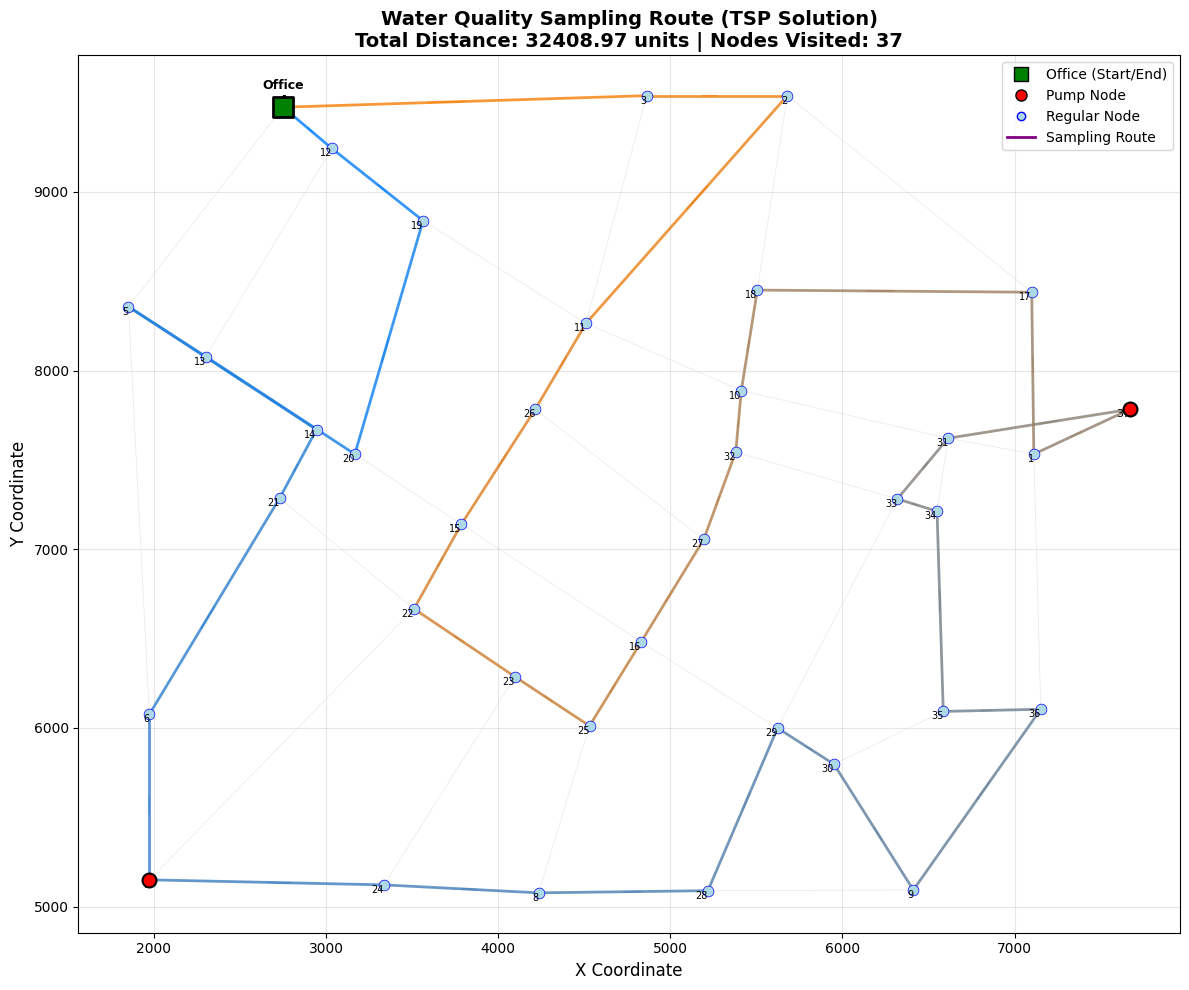


WATER QUALITY SAMPLING ROUTE DETAILS
Starting Point: Office (Node 4)
Total Distance: 32408.97 units
Number of Nodes: 37

Route Sequence:
  Start: Node 4 (Office)
    1.   Node 12
    2.   Node 19
    3.   Node 20
    4.   Node 13
    5.   Node 5
    6.   Node 14
    7.   Node 21
    8.   Node 6
    9.   Node 7
   10.   Node 24
   11.   Node 8
   12.   Node 28
   13.   Node 29
   14.   Node 30
   15.   Node 9
   16.   Node 36
   17.   Node 35
   18.   Node 34
   19.   Node 33
   20.   Node 31
   21.   Node 37
   22.   Node 1
   23.   Node 17
   24.   Node 18
   25.   Node 10
   26.   Node 32
   27.   Node 27
   28.   Node 16
   29.   Node 25
   30.   Node 23
   31.   Node 22
   32.   Node 15
   33.   Node 26
   34.   Node 11
   35.   Node 2
   36.   Node 3
  End:   Node 4 (Return to Office)


In [403]:
def draw_sampling_route(data, route, total_distance):
    nodes = data["nodes"]
    edges = data["edges"]
    office = data["office"]
    
    plt.figure(figsize=(12, 10))
    
    for edge in edges:
        u, v = edge[0], edge[1]
        nu, nv = nodes[u], nodes[v]
        x1, y1 = nu[0], nu[1]
        x2, y2 = nv[0], nv[1]
        plt.plot([x1, x2], [y1, y2], 'lightgray', linewidth=0.5, alpha=0.5)
    
    for i in range(len(route) - 1):
        u, v = route[i], route[i+1]
        nu, nv = nodes[u], nodes[v]
        x1, y1 = nu[0], nu[1]
        x2, y2 = nv[0], nv[1]
        
        color_intensity = i / (len(route) - 1)
        color = (color_intensity, 0.5, 1 - color_intensity)
        
        plt.plot([x1, x2], [y1, y2], color=color, linewidth=2, alpha=0.8)
        
        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        dx, dy = x2 - x1, y2 - y1
        plt.arrow(mid_x, mid_y, dx*0.1, dy*0.1, 
                 head_width=5, head_length=3, fc=color, ec=color, alpha=0.6)
    
    for node_id, (x, y, is_pump) in nodes.items():
        if node_id == office:
            plt.scatter(x, y, s=200, c='green', marker='s', 
                       edgecolors='black', linewidths=2, zorder=5)
            plt.text(x, y, f'Office\n{node_id}', fontsize=9, ha='center', 
                    va='bottom', fontweight='bold')
        elif is_pump:
            plt.scatter(x, y, s=100, c='red', marker='o', 
                       edgecolors='black', linewidths=1.5, zorder=4)
            plt.text(x, y, str(node_id), fontsize=8, ha='right', va='top')
        else:
            plt.scatter(x, y, s=60, c='lightblue', marker='o', 
                       edgecolors='blue', linewidths=0.5, zorder=3)
            plt.text(x, y, str(node_id), fontsize=7, ha='right', va='top')
    
    # Add route information
    plt.title(f"Water Quality Sampling Route (TSP Solution)\n"
             f"Total Distance: {total_distance:.2f} units | "
             f"Nodes Visited: {len(route)-1}", fontsize=14, fontweight='bold')
    plt.xlabel("X Coordinate", fontsize=12)
    plt.ylabel("Y Coordinate", fontsize=12)
    
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='s', color='w', markerfacecolor='green', 
               markersize=10, label='Office (Start/End)', markeredgecolor='black'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
               markersize=8, label='Pump Node', markeredgecolor='black'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', 
               markersize=6, label='Regular Node', markeredgecolor='blue'),
        Line2D([0], [0], color='purple', linewidth=2, label='Sampling Route')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print route details
    print("\n" + "="*60)
    print("WATER QUALITY SAMPLING ROUTE DETAILS")
    print("="*60)
    print(f"Starting Point: Office (Node {office})")
    print(f"Total Distance: {total_distance:.2f} units")
    print(f"Number of Nodes: {len(route)-1}")
    print(f"\nRoute Sequence:")
    for i, node_id in enumerate(route):
        if i == 0:
            print(f"  Start: Node {node_id} (Office)")
        elif i == len(route) - 1:
            print(f"  End:   Node {node_id} (Return to Office)")
        else:
            print(f"  {i:3d}.   Node {node_id}")
    print("="*60)

# Run Section 6: Water Quality Sampling (TSP Solution)
print("Solving TSP for water quality sampling route...")
print("This may take a moment for larger networks...\n")

route, total_distance = sampling(data)

# Display the route
draw_sampling_route(data, route, total_distance)

# PART 7

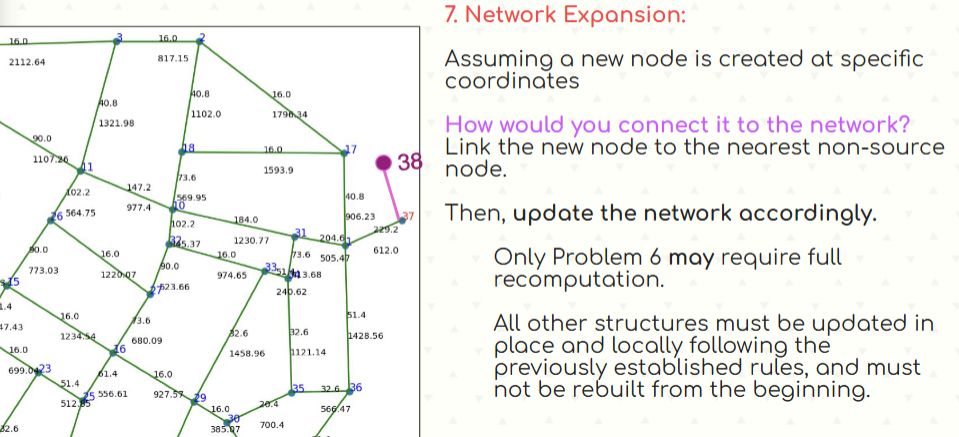

In [404]:
def expand_network_add_node(data, result, sinks, x, y, w):

    def euclid(a, b):
        return ((a[0]-b[0])**2 + (a[1]-b[1])**2) ** 0.5

    existing_ids = list(data["nodes"].keys())
    new_id = max(existing_ids) + 1 if existing_ids else 0

    data["nodes"][new_id] = (float(x), float(y), False)
    data["num_nodes"] = data.get("num_nodes", 0) + 1

    nearest_id = None
    nearest_dist = float("inf")
    for nid, node in data["nodes"].items():
        if nid == new_id:
            continue
        is_pump = node[2] if len(node) >= 3 else False
        if is_pump:
            continue  
        d = euclid((x, y), (node[0], node[1]))
        if d < nearest_dist:
            nearest_dist = d
            nearest_id = nid

    if nearest_id is None:
        for nid, node in data["nodes"].items():
            if nid == new_id:
                continue
            d = euclid((x, y), (node[0], node[1]))
            if d < nearest_dist:
                nearest_dist = d
                nearest_id = nid

    length = nearest_dist
    edge_tuple = (nearest_id, new_id, float(w), float(length))
    data["edges"].append(edge_tuple)
    data["num_edges"] = data.get("num_edges", 0) + 1

    if result is None:
        return new_id, nearest_id

    labels = result.get("labels")
    distances = result.get("distances")
    sectors = result.get("sectors")
    closed = result.get("closed_pipes")

    if labels is None or distances is None or sectors is None:
        return new_id, nearest_id

    neigh_label = labels.get(nearest_id)
    neigh_dist = distances.get(nearest_id, float("inf"))
    if neigh_label is not None and neigh_dist is not None and neigh_dist != float("inf"):
        labels[new_id] = neigh_label
        distances[new_id] = neigh_dist + length
        sectors.setdefault(neigh_label, []).append(new_id)
    else:
        labels[new_id] = None
        distances[new_id] = float("inf")
        sectors.setdefault(None, []).append(new_id)

    if closed is not None:
        other_label = labels.get(nearest_id)
        new_label = labels.get(new_id)
        if other_label != new_label:
            closed.append((nearest_id, new_id))

    if sinks is not None and neigh_label is not None:
        current_sink = sinks.get(neigh_label)
        current_sink_dist = distances.get(current_sink, -float("inf")) if current_sink is not None else -float("inf")
        if distances[new_id] > current_sink_dist:
            sinks[neigh_label] = new_id

    return new_id, nearest_id

In [405]:
print("="*80)
print("SECTION 7: NETWORK EXPANSION")
print("="*80)

print(f"\nBEFORE EXPANSION:")
print(f"  Total nodes: {len(data['nodes'])}")
print(f"  Total edges: {len(data['edges'])}")
print(f"  New nodes to add: {len(data['new_nodes'])}")
print(f"\nNew nodes from file:")
for i, (x, y, w) in enumerate(data["new_nodes"], 1):
    print(f"  {i}. Position: ({x:.2f}, {y:.2f}), Capacity: {w}")

added_nodes = []
for x, y, w in data["new_nodes"]:
    new_id, nearest_id = expand_network_add_node(data, result, sinks, x, y, w)
    added_nodes.append(new_id)
    print(f"  Added node {new_id}, connected to node {nearest_id}")

print("\n" + "="*80)
print("AFTER EXPANSION:")
print("="*80)
print(f"  Total nodes: {len(data['nodes'])}")
print(f"  Total edges: {len(data['edges'])}")

print("\n" + "="*80)
print("UPDATING DEPENDENT SECTIONS...")
print("="*80)

print("\nSection 4: Recalculating sinks (farthest nodes)...")
sinks = water_freshness(result)
print("Updated sinks:")
for pump, sink in sinks.items():
    print(f"  Sector {pump}: Sink Node = {sink}")

print("\nSection 5: Rechecking max flows...")
max_flows = ford_fulkerson(data, result, sinks)
print("Updated max flows:")
for pump, flow in max_flows.items():
    print(f"  Pump {pump} → Sink {sinks[pump]}: Flow = {flow}")

print("\nSection 6: Recomputing sampling route (TSP)...")
print("  (This is allowed to be a full recomputation per spec)")
route, total_distance = sampling(data)
print(f"  New route distance: {total_distance:.2f}")


SECTION 7: NETWORK EXPANSION

BEFORE EXPANSION:
  Total nodes: 37
  Total edges: 58
  New nodes to add: 2

New nodes from file:
  1. Position: (7071.00, 9055.00), Capacity: 50.0
  2. Position: (1957.00, 9160.00), Capacity: 45.0
  Added node 38, connected to node 17
  Added node 39, connected to node 5

AFTER EXPANSION:
  Total nodes: 39
  Total edges: 60

UPDATING DEPENDENT SECTIONS...

Section 4: Recalculating sinks (farthest nodes)...
Updated sinks:
  Sector 37: Sink Node = 2
  Sector 7: Sink Node = 4
  Sector None: Sink Node = 38

Section 5: Rechecking max flows...
  -> flow=79.8
  -> flow=63.0
Updated max flows:
  Pump 37 → Sink 2: Flow = 79.8
  Pump 7 → Sink 4: Flow = 63.0
  Pump None → Sink 38: Flow = 0

Section 6: Recomputing sampling route (TSP)...
  (This is allowed to be a full recomputation per spec)
  New route distance: 33276.88


VISUALIZING EXPANDED NETWORK


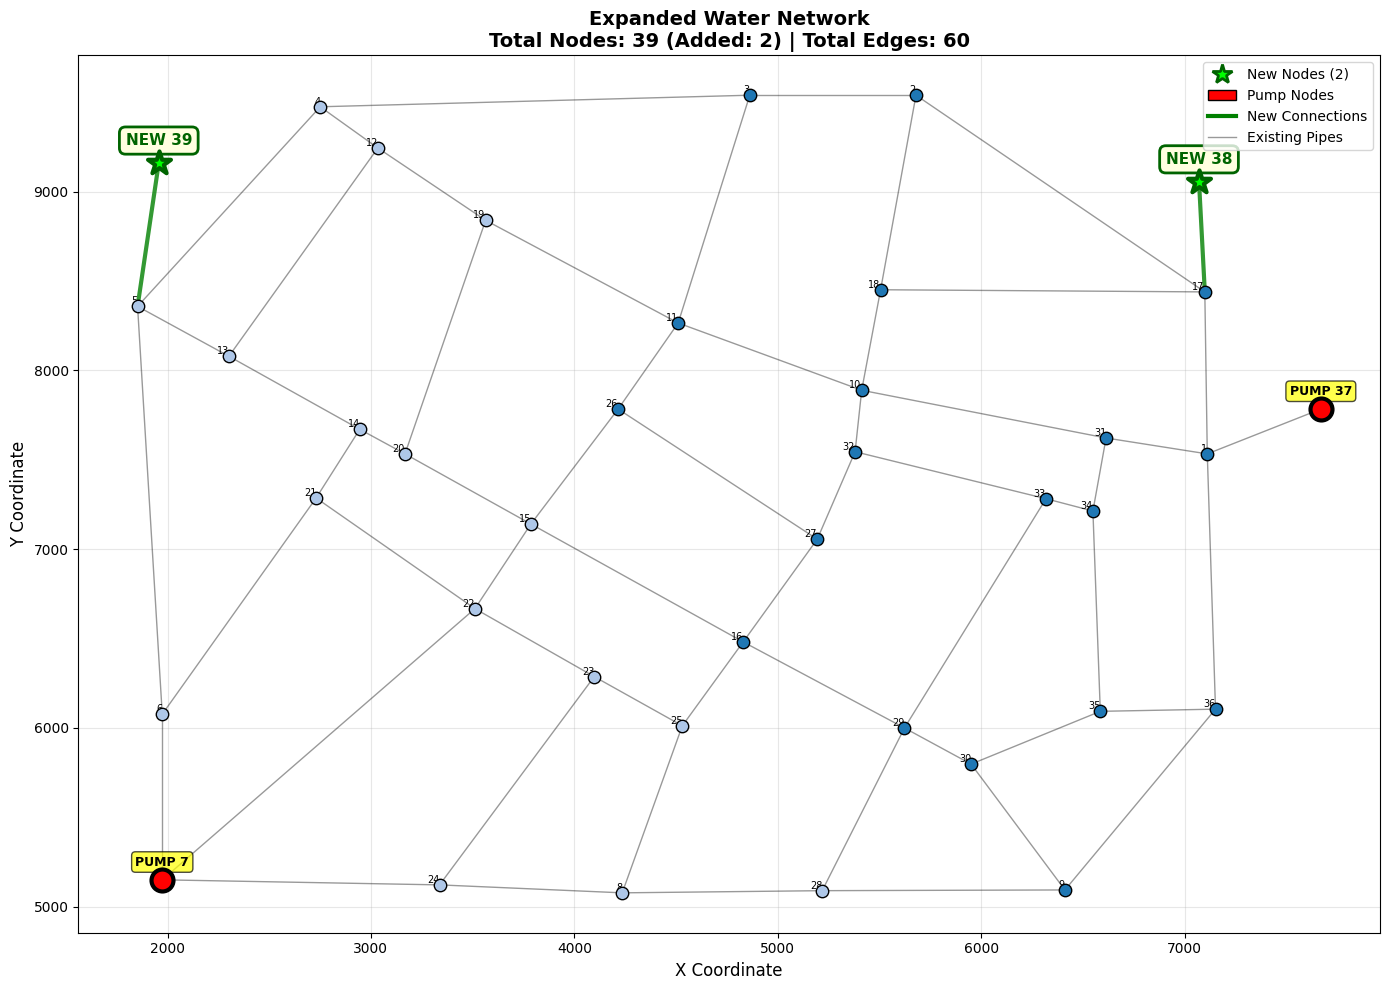

In [406]:
def draw_expanded_network(data, result, new_node_ids):
    nodes = data["nodes"]
    edges = data["edges"]
    labels = result["labels"]
    
    cmap = plt.get_cmap("tab20")
    sector_ids = list(result["sectors"].keys())
    palette = {sid: cmap(i % 20) for i, sid in enumerate(sector_ids)}
    
    plt.figure(figsize=(14, 10))
    
    new_edges = set()
    for edge in edges:
        u, v = edge[0], edge[1]
        if u in new_node_ids or v in new_node_ids:
            new_edges.add(tuple(sorted((u, v))))
    
    for edge in edges:
        u, v = edge[0], edge[1]
        nu, nv = nodes[u], nodes[v]
        x1, y1 = nu[0], nu[1]
        x2, y2 = nv[0], nv[1]
        
        edge_key = tuple(sorted((u, v)))
        
        if edge_key in new_edges:
            plt.plot([x1, x2], [y1, y2], 'g-', linewidth=3, 
                    alpha=0.8, zorder=3)
        else:
            plt.plot([x1, x2], [y1, y2], 'k-', linewidth=1, alpha=0.4)
    
    for nid, (x, y, is_pump) in nodes.items():
        sector = labels.get(nid)
        color = palette.get(sector, (0.7, 0.7, 0.7))
        
        if nid in new_node_ids:
            plt.scatter(x, y, s=300, c='lime', marker='*', 
                       edgecolors='darkgreen', linewidths=3, zorder=7)
            plt.text(x, y+100, f'NEW {nid}', fontsize=11, ha='center', 
                    fontweight='bold', color='darkgreen',
                    bbox=dict(boxstyle='round,pad=0.4', 
                    facecolor='lightyellow', edgecolor='darkgreen', linewidth=2))
        elif is_pump:
            plt.scatter(x, y, s=250, c='red', edgecolors='black', 
                       linewidths=3, marker='o', zorder=6)
            plt.text(x, y+80, f'PUMP {nid}', fontsize=9, ha='center', 
                    fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', 
                    facecolor='yellow', alpha=0.7))
        else:
            plt.scatter(x, y, s=80, c=[color], marker='o', 
                       edgecolors='black', linewidths=1, zorder=5)
            plt.text(x, y, str(nid), fontsize=7, ha='right', va='bottom')
    
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='*', color='w', markerfacecolor='lime', 
               markersize=15, label=f'New Nodes ({len(new_node_ids)})', 
               markeredgecolor='darkgreen', markeredgewidth=2),
        Patch(facecolor='red', edgecolor='black', label='Pump Nodes'),
        Line2D([0], [0], color='green', linewidth=3, label='New Connections'),
        Line2D([0], [0], color='black', linewidth=1, alpha=0.4, label='Existing Pipes'),
    ]
    
    plt.legend(handles=legend_elements, loc='upper right', fontsize=10)
    plt.title(f"Expanded Water Network\n" + 
             f"Total Nodes: {len(nodes)} (Added: {len(new_node_ids)}) | " +
             f"Total Edges: {len(edges)}", 
             fontsize=14, fontweight='bold')
    plt.xlabel("X Coordinate", fontsize=12)
    plt.ylabel("Y Coordinate", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("VISUALIZING EXPANDED NETWORK")
draw_expanded_network(data, result, added_nodes)